/home/johanres/Documents/Python/paramest/Stability/stability_class.py:233: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(sqrt(k2/k1)*y_1, y_1, label=r'$\sqrt{k_2/k_1}y_1$')
/home/johanres/Documents/Python/paramest/Stability/stability_class.py:233: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(sqrt(k2/k1)*y_1, y_1, label=r'$\sqrt{k_2/k_1}y_1$')


<Figure size 432x288 with 0 Axes>

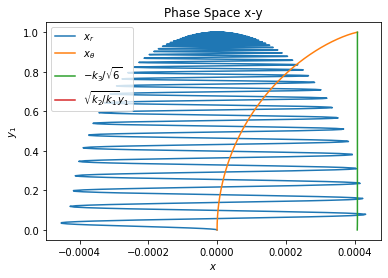

/home/johanres/Documents/Python/paramest/Stability/stability_class.py:310: RuntimeWarning: invalid value encountered in true_divide
  weq = -1 + 2/(1 + self.params['p']/2 + self.params['p'] * self.params['V0'] * exp(-self.params['alpha'] * theta) / (self.params['m']**2 * r_eq**2))
/home/johanres/Documents/Python/paramest/Stability/stability_class.py:201: RuntimeWarning: invalid value encountered in true_divide
  Omega_squared = 1/f*(dot_r * V_theta - f * dot_theta * V_r)**2 / (dot_r**2 + f * dot_theta**2)**2


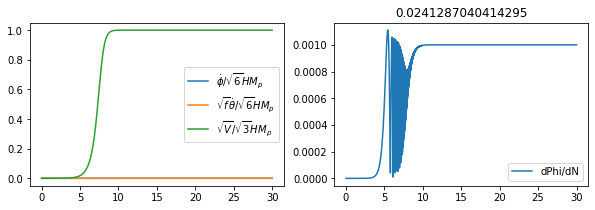

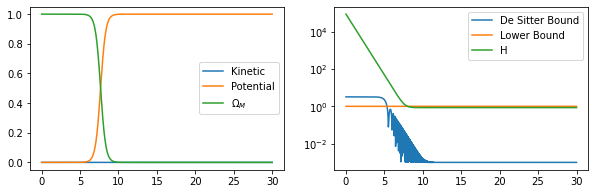

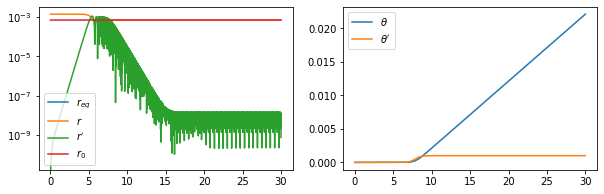

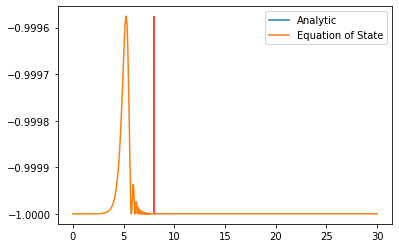

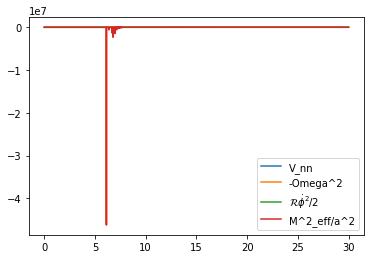

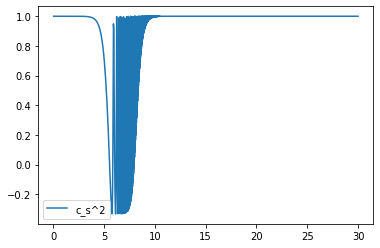

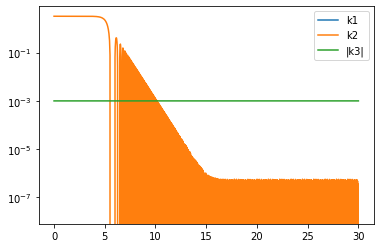

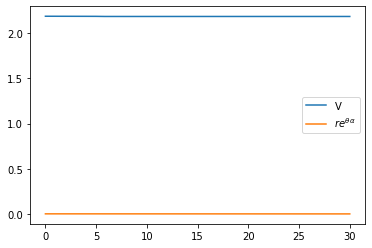

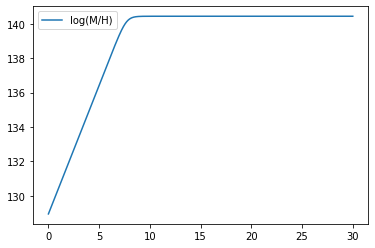

De Sitter Bound Lowest 0.0010000000000294786
Delta phi: 0.0241287040414295
-0.9999996666666666 0.9999999999999983


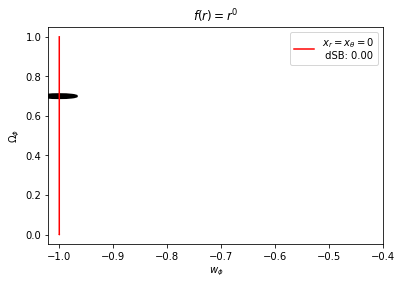

In [2]:
from stability_class import MultiFieldDarkEnergy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

params = {
    'Omega_M_0': 0.3,
    'Omega_R_0': 6e-5,
    'V0': 2.186,
    'm': 100,
    'r0': 7*1e-4,
    'alpha': 1e-3,
    'x_p_init': 0.0,
    'x_t_init': 0.0,
    'y_1_init': 1e-5,
    'r_init_multiplier': 2,
    'p': 0,
    'cosmo_constant': 0
}

x_range = [0]
colors = ['red', 'blue', 'green']
plt.figure()
for i, x in enumerate(x_range):
    params['x_p_init'] = x
    params['x_t_init'] = x
    #params['V0'] = V0
    c = MultiFieldDarkEnergy(metric='r_p', potential='exp_spinning', params=params, N_min = 0, N_max = 30, gamma=1)
    c.run_background_eq_of_motion()
    c.x_y_phase_plot()
    c.plot_swampland_bound()

    print('De Sitter Bound Lowest', min(c.get_de_sitter_bound()))
    field_derivative, delta_phi = c.get_field_derivative()
    print('Delta phi:', delta_phi)
    size = len(c.get_eq_of_state())
    w = c.get_eq_of_state()
    omega = c.get_omega_phi()
    N = c.sol['t']
    delta_phi_n = -1
    for j in range(size):
        cur = np.trapz(np.sqrt(3)*np.sqrt((1+w[:j])*omega[:j]), N[:j])
        if cur > 1:
            delta_phi_n = j
            break
    print(w[delta_phi_n], omega[delta_phi_n])
    plt.plot(w, omega, label=r"$x_r = x_{\theta} = $"+str(x) +'\n dSB: '+"{:.2f}".format(min(c.get_de_sitter_bound())), color=colors[i])
    if delta_phi_n>0 :plt.plot(w[delta_phi_n], omega[delta_phi_n], 'go', color='black')
plt.xlim([-1.02, -0.4])
plt.ylim([-0.05, 1.05])
cur_uni = Ellipse(xy=(-1, 0.7), width=0.065, height=0.02, 
                        edgecolor='black', fc='black', lw=2)#, zorder=100)
ax = plt.gca()
ax.add_patch(cur_uni)
plt.xlabel(r'$w_{\phi}$')
plt.ylabel(r'$\Omega_{\phi}$')
plt.title(r'$f(r) =r^{}$'.format(params['p']))
plt.legend()
#plt.savefig('img/exp_spinning_p_-2_r_init.pdf', bbox_inches = 'tight')

plt.show()

[  0.          36.36363636  72.72727273 109.09090909 145.45454545
 181.81818182 218.18181818 254.54545455 290.90909091 327.27272727
 363.63636364 400.        ]
[1.6        1.72727273 1.85454545 1.98181818 2.10909091 2.23636364
 2.36363636 2.49090909 2.61818182 2.74545455 2.87272727 3.        ]
0
1
2
0.06719483377484979 36.36363636363637 1.8545454545454545
0.08989708429726352 72.72727272727273 1.8545454545454545
0.10443862133238331 109.0909090909091 1.8545454545454545
0.1164901863983312 145.45454545454547 1.8545454545454545
0.12504729294643105 181.81818181818184 1.8545454545454545
0.1328195525984025 218.1818181818182 1.8545454545454545
0.13963080662874483 254.54545454545456 1.8545454545454545
0.14502566121983038 290.90909090909093 1.8545454545454545
0.14956201929484148 327.2727272727273 1.8545454545454545
0.15350359065416475 363.6363636363637 1.8545454545454545
0.15621584382687678 400.0 1.8545454545454545
3
0.08279223685850304 36.36363636363637 1.981818181818182
0.11153371958252606 72.7

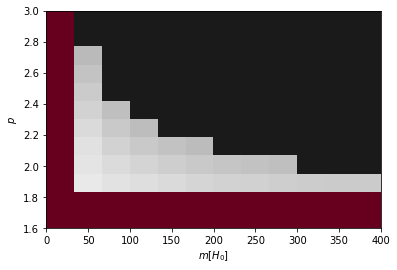

In [18]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

params = {
    'Omega_M_0': 0.3,
    'Omega_R_0': 6e-5,
    'V0': 2.15,
    'm': 10,
    'r0': 7*1e-4,
    'alpha': 2/2.186*1e-3,
    'x_p_init': 0.0,
    'x_t_init': 0.0,
    'y_1_init': 1e-5,
    'p': 2,
    'r_init_multiplier': 1,
    'cosmo_constant': 0,
}

cur_time = Polygon([(-1.05, 0.65), (-0.95, 0.75), (-0.95, 0.65), (-1.05, 0.75)])

length = 12
list_accepted = np.zeros((length, length))

p_range = np.linspace(1.6, 3, length)
m_range = np.linspace(0, 400, length)
print(m_range)
print(p_range)
colors = ['red', 'blue']
plt.figure()
for i, p in enumerate(p_range):
    print(i)
    for j, m in enumerate(m_range):
        params['p'] = p
        params['m'] = m
        c = MultiFieldDarkEnergy(metric='r_p', potential='exp_spinning', params=params, N_min = 0, N_max = 9, gamma=1)
        c.run_background_eq_of_motion()
        #c.plot_swampland_bound()
        field_derivative, delta_phi = c.get_field_derivative()
        size = len(c.get_eq_of_state())
        w = c.get_eq_of_state()
        omega = c.get_omega_phi()
        N = c.sol['t']
        cur_param = 0.5
        if min(c.get_de_sitter_bound()) < 0.5:
            cur_param = 0
            #print(p, m)
            #print('De Sitter violated', min(c.get_de_sitter_bound()))
        else:
            for k in range(size):
                point = Point(w[k], omega[k])
                if cur_time.contains(point):
                    # This solution has once been in omega=0.7 w=-1
                    #print('H:', c.get_H()[k])
                    cur = np.trapz(np.sqrt(3)*np.sqrt((1+w[:k])*omega[:k]), N[:k])
                    # cur = delta phi at omega=0.7 w=-1
                    cur_param = 0.5 + cur
                    print(cur, m, p)
                    if cur > 1:
                        cur_param= 1
                        print
                    break
                elif k == size-1:
                    # This solution has NEVER been in omega=0.7 w=-1
                    cur_param = 1
        if omega[size-1] < 0.9 and w[size-1] < -0.8:
            cur_param=-1        
        list_accepted[i, j] = cur_param
        #if cur_param == 1:
        #    print('Last eq of state:', w[size-1])
        #print(cur_param, p, m)


plt.xlabel(r'$m [H_0]$')
plt.ylabel(r'$p$')
plt.imshow(list_accepted, origin = 'lower', extent=[np.amin(m_range), np.amax(m_range), np.amin(p_range), np.amax(p_range)], aspect='auto',cmap='RdGy')
#plt.colorbar()

#plt.savefig('img/test.pdf', bbox_inches = 'tight')

plt.show()

0
1
2
3
4
0.06882397709668323 54.54545454545455 3.0
0.07781264897762152 72.72727272727273 3.0
0.08441489906090964 90.90909090909092 3.0
0.09115366708276224 109.0909090909091 3.0
0.09587554753774664 127.27272727272728 3.0
0.101105536057491 145.45454545454547 3.0
0.10499256882061733 163.63636363636365 3.0
0.10951434691955338 181.81818181818184 3.0
0.11272286379403063 200.00000000000003 3.0
0.11584685105373652 218.1818181818182 3.0
0.11911082222228951 236.36363636363637 3.0
0.12148616084464188 254.54545454545456 3.0
0.12435099202953795 272.72727272727275 3.0
0.12618920229949812 290.90909090909093 3.0
0.12829685504097027 309.0909090909091 3.0
0.13042030169129676 327.2727272727273 3.0
0.13181933989980865 345.4545454545455 3.0
0.1339909395365988 363.6363636363637 3.0
0.13549171897147988 381.81818181818187 3.0
0.13673059407950608 400.00000000000006 3.0
0.13825494440085892 418.18181818181824 3.0
0.13951096536280927 436.3636363636364 3.0
0.14099909847321573 454.54545454545456 3.0
0.142141228947

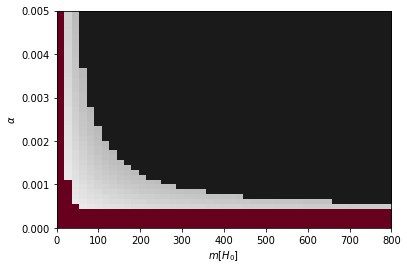

In [25]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

params = {
    'Omega_M_0': 0.3,
    'Omega_R_0': 6e-5,
    'V0': 2.15,
    'm': 10,
    'r0': 7*1e-4,
    'alpha': 2/2.186*1e-3,
    'x_p_init': 0.0,
    'x_t_init': 0.0,
    'y_1_init': 1e-5,
    'p': 2,
    'r_init_multiplier': 1,
    'cosmo_constant': 0,
}

cur_time = Polygon([(-1.05, 0.65), (-0.95, 0.75), (-0.95, 0.65), (-1.05, 0.75)])

length = 45
list_accepted = np.zeros((length, length))

alpha_range = np.linspace(0, 0.005, length)
m_range = np.linspace(0, 800, length)
colors = ['red', 'blue']
plt.figure()
for i, alpha in enumerate(alpha_range):
    print(i)
    for j, m in enumerate(m_range):
        params['alpha'] = alpha
        params['m'] = m
        c = MultiFieldDarkEnergy(metric='r_p', potential='exp_spinning', params=params, N_min = 0, N_max = 9, gamma=1)
        c.run_background_eq_of_motion()
        #c.plot_swampland_bound()
        field_derivative, delta_phi = c.get_field_derivative()
        size = len(c.get_eq_of_state())
        w = c.get_eq_of_state()
        omega = c.get_omega_phi()
        N = c.sol['t']
        cur_param = 0.5
        if min(c.get_de_sitter_bound()) < 0.5:
            cur_param = 0
            #print(p, m)
            #print('De Sitter violated', min(c.get_de_sitter_bound()))
        else:
            for k in range(size):
                point = Point(w[k], omega[k])
                if cur_time.contains(point):
                    # This solution has once been in omega=0.7 w=-1
                    #print('H:', c.get_H()[k])
                    cur = np.trapz(np.sqrt(3)*np.sqrt((1+w[:k])*omega[:k]), N[:k])
                    # cur = delta phi at omega=0.7 w=-1
                    cur_param = 0.5 + cur
                    print(cur, m, p)
                    if cur > 1:
                        cur_param= 1
                        print
                    break
                elif k == size-1:
                    # This solution has NEVER been in omega=0.7 w=-1
                    cur_param = 1
        if omega[size-1] < 0.9 and w[size-1] < -0.8:
            cur_param=-1        
        list_accepted[i, j] = cur_param
        #if cur_param == 1:
        #    print('Last eq of state:', w[size-1])
        #print(cur_param, p, m)


plt.xlabel(r'$m [H_0]$')
plt.ylabel(r'$\alpha$')
plt.imshow(list_accepted, origin = 'lower', extent=[np.amin(m_range), np.amax(m_range), np.amin(alpha_range), np.amax(alpha_range)], aspect='auto',cmap='RdGy')
#plt.colorbar()

plt.savefig('img/test2.pdf', bbox_inches = 'tight')

plt.show()